<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/mnist_%E6%89%8B%E5%AF%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import keras

In [3]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# mac

In [4]:
from keras.datasets.mnist import load_data
#((訓練題目, 訓練答案), (測試題目, 測試答案))
((x_train, y_train), (x_test, y_test)) = load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


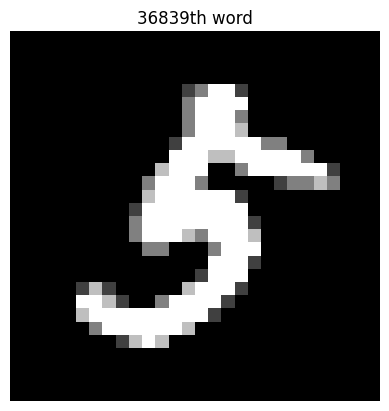

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, x_train.shape[0] - 1)
plt.axis("off") 
plt.title(f"{c}th word")
plt.imshow(x_train[c], cmap="gray") # 灰階

In [7]:
import pandas as pd
cth_word = pd.DataFrame(x_train[c])
cth_word

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,255,128,128,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,128,0,0,0,0,0


In [8]:
# 資料預處理 weight 調整
# 1. 題目預處理(Normalize)
# keras在準備隨機那組weights, 跟Normalize的圖片比較搭
# 1. 第一組方式: x_train /255 0 ~ 1 第二種方式 -1 ~ 1
# 攤開 --> Keras MlP 規定一定要攤開成為1D
x_train_shape = x_train.reshape(x_train.shape[0], x_train.shape[1]**2) /255 
x_test_shape = x_test.reshape(x_test.shape[0], x_train.shape[1]**2) /255 
# DEMO
x_test_shape[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
# 2.答案預處理(One-hot encoding)
# 希望的樣子:[p0, p1,.....,p9] 1,2,3,4...0
# 5:[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# 可能輸出:[0, 0, 0.2, 0, 0.8, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Dome
print("原來:", y_train[5])
print("後來:", y_train_cat[5])

原來: 2
後來: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
# 建立模型
# 第一種: 蛋糕支架(Seqential), 堆上一層(Layers)
# Layers: Dense(全連接層)
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# layes units
mlp.add(Dense(128, activation="relu", input_dim=784))
# param:128 * 10 (神經元的連結) + 10(10個輸出, 10個激活 ->> 10個bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 確定模型訓練方商....等
# 隨機梯度下降 (隨便選一組weight) (負梯度方向移動)
# loss: 最後輸出一個: binary_crossentropy 最後輸出多個 categorical_crossentropy
# lose: mse, mae continuous output
# optimizer: adam
mlp.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="adam")

In [12]:
# batch 通常100~200 修正一次 看幾筆做一次梯度下降
# epochs: train full data times
# ex 60000 samples ,200 batch_size ,10 epochs , 60000 * 10 / 200 = 3000 edit_times
# verbose 去掉進度條
mlp.fit(
    x_train_shape,
    y_train_cat,
    batch_size=200,
    epochs=15,
    validation_split=0.1,
    verbose=2)
# val_loss validation_split

Epoch 1/15
270/270 - 3s - loss: 0.4289 - accuracy: 0.8834 - val_loss: 0.1926 - val_accuracy: 0.9503 - 3s/epoch - 12ms/step
Epoch 2/15
270/270 - 2s - loss: 0.2049 - accuracy: 0.9424 - val_loss: 0.1405 - val_accuracy: 0.9625 - 2s/epoch - 7ms/step
Epoch 3/15
270/270 - 2s - loss: 0.1517 - accuracy: 0.9565 - val_loss: 0.1147 - val_accuracy: 0.9698 - 2s/epoch - 8ms/step
Epoch 4/15
270/270 - 2s - loss: 0.1204 - accuracy: 0.9656 - val_loss: 0.1007 - val_accuracy: 0.9722 - 2s/epoch - 9ms/step
Epoch 5/15
270/270 - 3s - loss: 0.0996 - accuracy: 0.9719 - val_loss: 0.0917 - val_accuracy: 0.9730 - 3s/epoch - 10ms/step
Epoch 6/15
270/270 - 3s - loss: 0.0837 - accuracy: 0.9764 - val_loss: 0.0875 - val_accuracy: 0.9752 - 3s/epoch - 11ms/step
Epoch 7/15
270/270 - 2s - loss: 0.0711 - accuracy: 0.9799 - val_loss: 0.0838 - val_accuracy: 0.9750 - 2s/epoch - 9ms/step
Epoch 8/15
270/270 - 3s - loss: 0.0617 - accuracy: 0.9827 - val_loss: 0.0836 - val_accuracy: 0.9768 - 3s/epoch - 10ms/step
Epoch 9/15
270/270 -

In [32]:
import numpy as np
# predictions = (mlp.predict(x_test_shape) > 0.5)
from sklearn.metrics import confusion_matrix
# argmax 最大值的索引值 axis = 選比較維度
predictions = np.argmax(mlp.predict(x_test_shape), axis=1)
predictions
pd.DataFrame(confusion_matrix(y_test,predictions))
# columns 欄位=錯誤標籤 row_欄位 = 正確標籤

313/313 [==============================] - 1s 2ms/step


,0,1,2,3,4,5,6,7,8,9
0,963,0,4,0,1,4,4,1,2,1
1,0,1124,3,1,0,3,2,0,2,0
2,2,4,1008,3,3,0,2,4,6,0
3,0,0,2,988,0,9,0,3,2,6
4,0,0,2,1,968,0,5,1,0,5
5,2,0,0,5,1,874,3,1,4,2
6,5,3,4,1,4,5,935,0,1,0
7,0,5,11,5,0,0,0,997,0,10
8,1,2,5,7,6,7,2,4,932,8
9,2,6,0,8,13,3,0,2,0,975


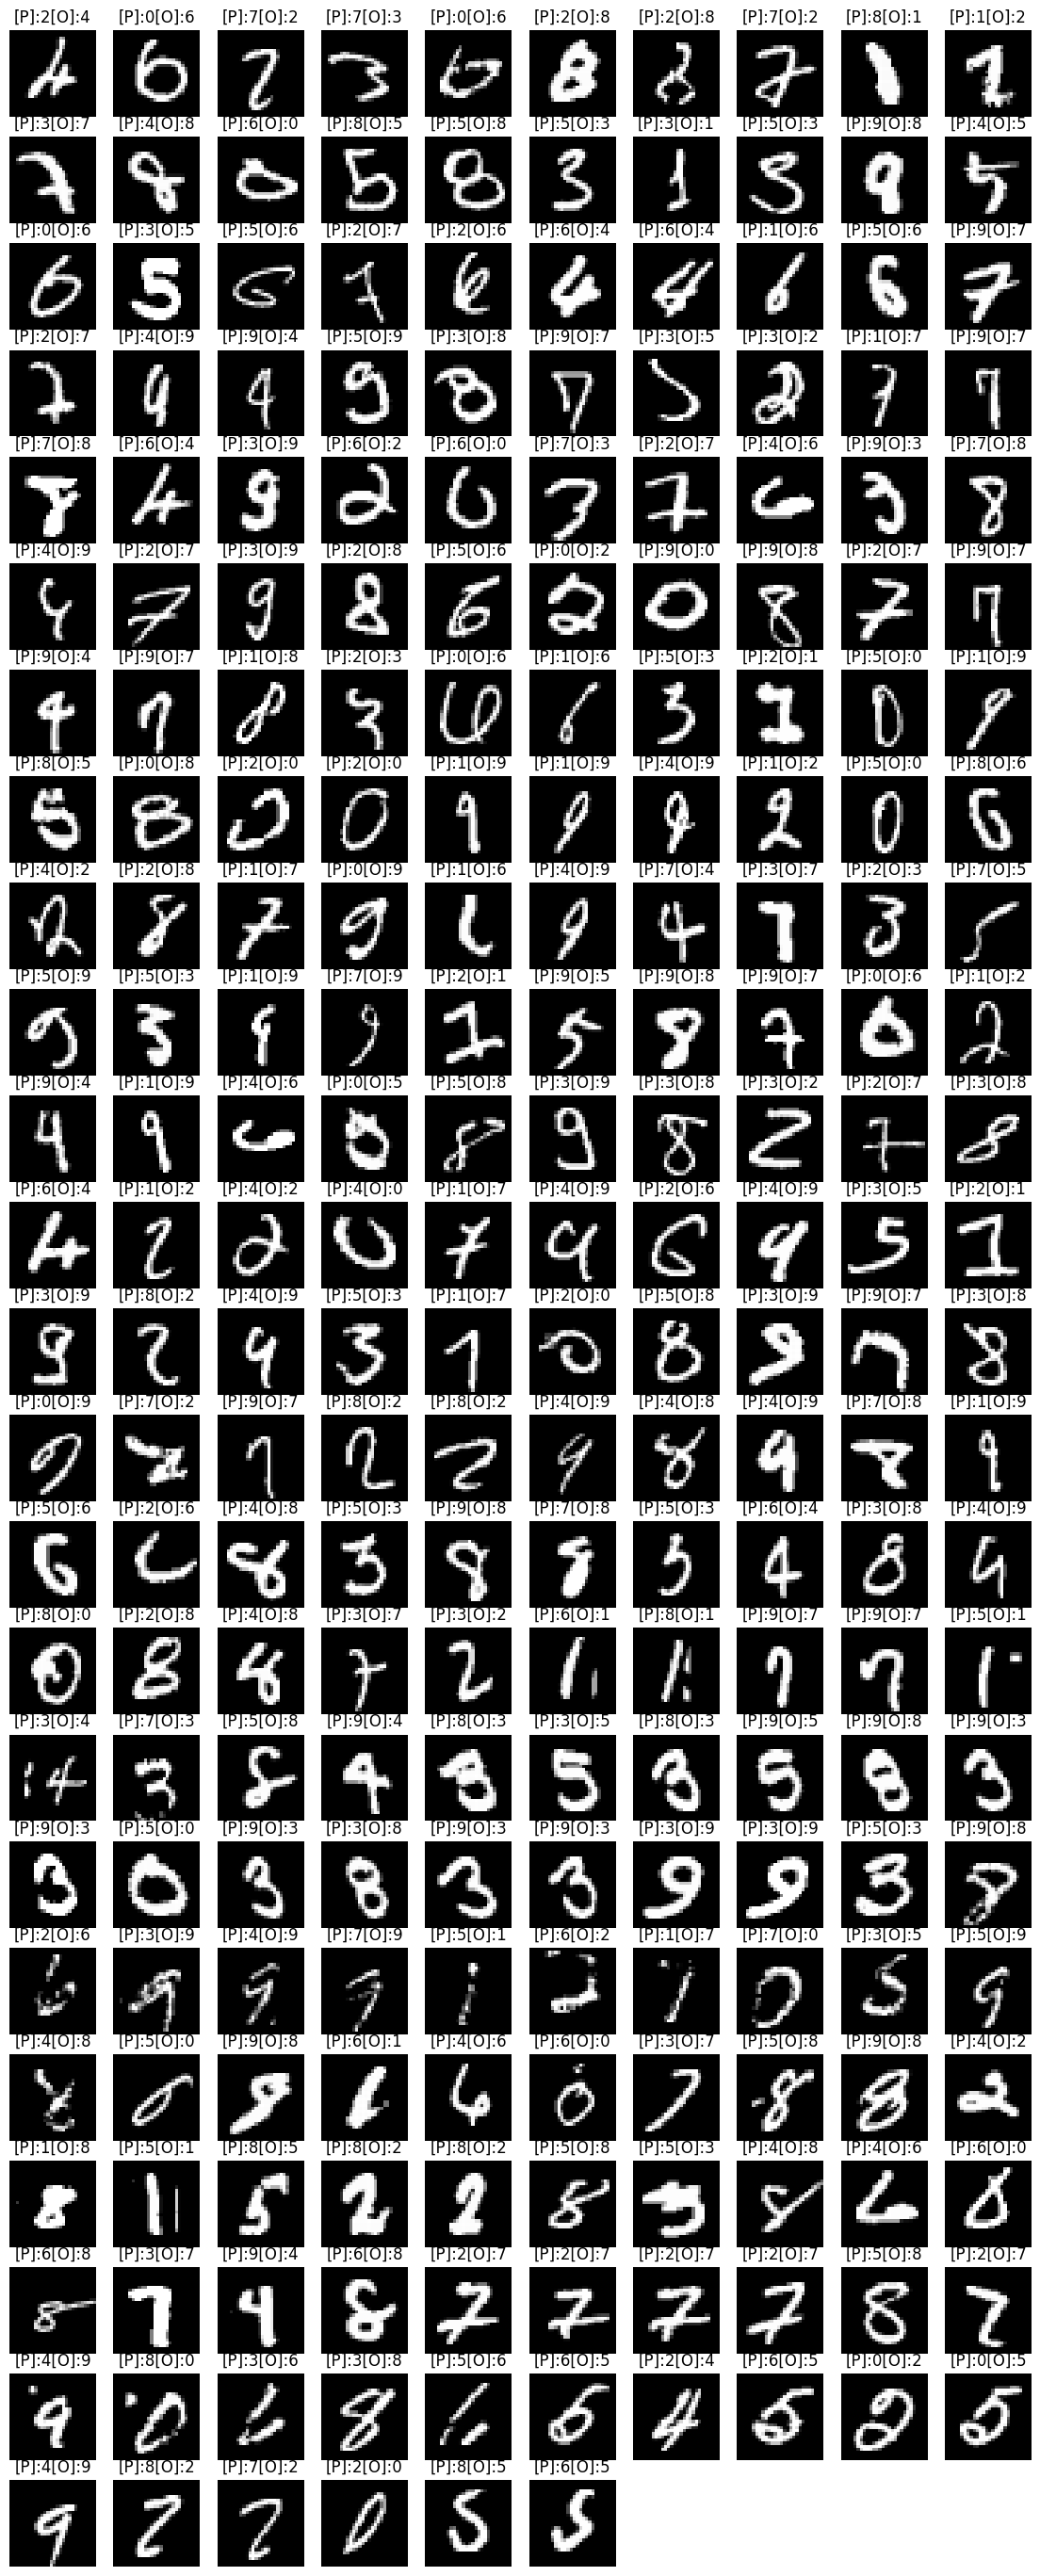

In [40]:
# numpy 才能直接做每個數字做比較
# 找預測錯誤的index
# list: list[一個index]
# numpy: arraty[多個index]
diff = np.nonzero(predictions != y_test)
# predict error ,correct value
orifalse = y_test[diff]
# predict error ,predict value
prefalse = predictions[diff]
# 取出原始圖
imagefalse = x_test[diff]
plt.figure(figsize=(14, 35))
width = 10
height = int(len(imagefalse)/10) + 1
for (i, img) in enumerate(imagefalse):
    plt.subplot(height, width, i + 1)
    plt.axis("off") # 去 x_axis, y_axis index
    t = "[P]:" + str(prefalse[i]) + "[O]:" + str(orifalse[i])
    plt.title(t)
    plt.imshow(img, cmap="gray")
